<div style="padding:25px;color:black;margin:0;font-size:250%;text-align:center;display:fill;border-radius:10px;background-color:#D4C8BA;overflow:hidden;font-weight:500;font-family:magra">AL NASHI</div>

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings 
warnings.filterwarnings('ignore')


from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,precision_score


In [113]:
data1=pd.read_excel(r"C:/Users/savad/Desktop/datas/Machine learning/machine learning projects/logistic data/J AND T SEPTEMBER TRUCK SHEET (FULL) (2).xlsx")

In [114]:
data1

,Sl#,Date,From,Destination,vehcile Type,Vehcile Number,charges
0,1,2022-09-01,RIYADH,KHAMIS MUSHAT,FSR,8453,1850
1,2,2022-09-01,RIYADH,MADEENAH,FSR,7228,1700
2,3,2022-09-01,RIYADH,JEDDAH,FSR,3807,1400
3,4,2022-09-01,RIYADH,KHAMIS MUSHAT,FSR,5417,1850
4,5,2022-09-01,RIYADH,JEDDAH,FSR,1633,1400
...,...,...,...,...,...,...,...
138,139,2022-09-29,RIYADH,JEDDAH,FSR,6404,1400
139,140,2022-09-29,RIYADH,JEDDAH,COOL FSR,9954,1950
140,141,2022-09-30,RIYADH,BURIDHA,DYNA,3511,800
141,142,2022-09-30,RIYADH,JEDDAH,DYNA,8378,1200


In [115]:
data1=data1[['From','Destination','vehcile Type','charges']]

In [116]:
data1.head()

,From,Destination,vehcile Type,charges
0,RIYADH,KHAMIS MUSHAT,FSR,1850
1,RIYADH,MADEENAH,FSR,1700
2,RIYADH,JEDDAH,FSR,1400
3,RIYADH,KHAMIS MUSHAT,FSR,1850
4,RIYADH,JEDDAH,FSR,1400


In [117]:
data1=data1.rename(columns={'vehcile Type':'Vehicle Type','charges':'Charges'})

In [118]:
data2=pd.read_excel(r"C:/Users/savad/Desktop/datas/Machine learning/machine learning projects/logistic data/Copy of Aramex Invoice Septh 2021 invice 2.xlsx")

In [119]:
data2.head()

,Unnamed: 0,Date,From,Destination,Vehicle Type,Driver Name,Type,owner,Charges,Unnamed: 9
0,NaN,2021-08-18,RIYADH,KHAFJI,DYNA,AL NASHI 5727 (GOPALEN),NaN,GOPALEN,850,NaN
1,1.0,2021-08-26,RIYADH,NAJRAN,FSR,AL NASHI CO 8422 (WAHID),NaN,WAHID,2200,NaN
2,2.0,2021-08-26,RIYADH,YANBU,FSR,MAYRGHANI,NaN,9954,2300,NaN
3,3.0,2021-08-26,RIYADH,QUNFUDHA,DYNA,JAMSHI,NaN,SAIFULLAH,1950,NaN
4,4.0,2021-08-26,RIYADH,AL BAHA,FSR,ABID HUSSAIN,NaN,ABID,1900,NaN


In [120]:
data2=data2[['From','Destination','Vehicle Type','Charges']]

In [121]:
data2.head(10)

,From,Destination,Vehicle Type,Charges
0,RIYADH,KHAFJI,DYNA,850
1,RIYADH,NAJRAN,FSR,2200
2,RIYADH,YANBU,FSR,2300
3,RIYADH,QUNFUDHA,DYNA,1950
4,RIYADH,AL BAHA,FSR,1900
5,RIYADH,AL JOUF,FSR,2025
6,RIYADH,ARAR,DYNA,1600
7,RIYADH,ARAR,DYNA,1600
8,RIYADH,AL JOUF,FSR,2025
9,RIYADH,HAIL,FSR,1450


In [122]:
data3=pd.read_excel(r"C:/Users/savad/Desktop/datas/Machine learning/machine learning projects/logistic data/new invoice 1.xlsx")
data3.head()

,Unnamed: 0,Unnamed: 1,Date,From,Destination,Vehicle Type,Driver name,type,Owner,Charges
0,NaN,1,26/05/2021,RIYADH,AL JOUF,DYNA,AL NASHI 8504 ( AKTHER),NaN,AKTHER,1600
1,NaN,2,26/05/2021,RIYADH,AL KHARAJ,DYNA,AL NASHI CO 4950 ( M ALI),NaN,ALI,450
2,NaN,3,26/05/2021,RIYADH,JEDDAH,DYNA,JAMSHI,SPCL,SAIFULLAH,1200
3,NaN,4,26/05/2021,RIYADH,JEDDAH,DYNA,JAMSHI,SPCL,MAJEED,1300
4,NaN,5,26/05/2021,RIYADH,HAIL,FSR,SUHAIL,NaN,RAFIUDHEEN,1450


In [123]:
data3=data3[['From','Destination','Vehicle Type','Charges']]
data3.head(5)

,From,Destination,Vehicle Type,Charges
0,RIYADH,AL JOUF,DYNA,1600
1,RIYADH,AL KHARAJ,DYNA,450
2,RIYADH,JEDDAH,DYNA,1200
3,RIYADH,JEDDAH,DYNA,1300
4,RIYADH,HAIL,FSR,1450


In [124]:
data4=pd.read_excel(r"C:/Users/savad/Desktop/datas/Machine learning/machine learning projects/logistic data/Copy of Aramex chart 2022 Janu-Feb.xlsx")
data4=data4.rename(columns={'Vechile type':'Vehicle Type','Amount':'Charges'})
data4=data4[['From','Destination','Vehicle Type','Charges']]
data4.tail()

,From,Destination,Vehicle Type,Charges
323,RIYADH,ARAR,DYNA,1600
324,RIYADH,AL JOUF,DYNA,1600
325,RIYADH,MADEENA,FSR,1700
326,RIYADH,MAKKAH,FSR,1400
327,RIYADH,DAMMAM,FSR,700


In [125]:
data5=pd.read_excel(r"C:\Users\savad\Desktop\Copy of Aramex chart 2022 Feb-March.xlsx")
data5=data5.rename(columns={'Vechile type':'Vehicle Type','Amount':'Charges'})
data5=data5[['From','Destination','Vehicle Type','Charges']]
data5.tail()

,From,Destination,Vehicle Type,Charges
323,RIYADH,HAIL,FSR,1450
324,RIYADH,WADI DAWASSIR,DYNA,700
325,RIYADH,DAWADMI,DYNA,600
326,RIYADH,ARAR,DYNA,1600
327,RIYADH,ABAHA,DYNA,1600


In [126]:
data=pd.concat([data1,data2,data3,data4,data5])

In [127]:
data.head(10)

,From,Destination,Vehicle Type,Charges
0,RIYADH,KHAMIS MUSHAT,FSR,1850
1,RIYADH,MADEENAH,FSR,1700
2,RIYADH,JEDDAH,FSR,1400
3,RIYADH,KHAMIS MUSHAT,FSR,1850
4,RIYADH,JEDDAH,FSR,1400
5,JEDDAH,TAIF,DYNA,800
6,JEDDAH,MAKKAH,DYNA,1150
7,BURIDHA,AL JOUF + ARAR,DYNA,1600
8,RIYADH,BURIDHA,DYNA,800
9,RIYADH,KHAMIS MUSHAT,FSR,1850


In [128]:
data.shape

(1259, 4)

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 327
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   From          1259 non-null   object
 1   Destination   1259 non-null   object
 2   Vehicle Type  1259 non-null   object
 3   Charges       1259 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 49.2+ KB


<div style="padding:25px;color:black;margin:0;font-size:250%;text-align:center;display:fill;border-radius:10px;background-color:#D4C8BA;overflow:hidden;font-weight:500;font-family:magra">Data preprocessing</div>

In [130]:
data.isna().sum()

From            0
Destination     0
Vehicle Type    0
Charges         0
dtype: int64

In [131]:
data.dropna(inplace=True)
data.shape

(1259, 4)

In [132]:
l=data.columns

for i,col in enumerate(l):
    unique=data[col].unique()
    nu_unique=data[col].nunique()
    print(f'{i} ->  {col} -> number of unique:{nu_unique}    uniques:{unique}'.format(i,col,nu_unique,unique))
   

0 ->  From -> number of unique:9    uniques:['RIYADH' 'JEDDAH' 'BURIDHA' 'MADEENAH' 'HAFER' 'HBT' 'HAIL' 'ARAR'
 'AL JOUF']
1 ->  Destination -> number of unique:75    uniques:['KHAMIS MUSHAT ' 'MADEENAH' 'JEDDAH  ' 'JEDDAH' 'TAIF' 'MAKKAH'
 'AL JOUF + ARAR' 'BURIDHA' 'RIYADH' 'LOCAL TRANSFER' 'AL JOUF ' 'KHAFJI'
 'NAJRAN' 'YANBU' 'QUNFUDHA' 'AL BAHA' 'AL JOUF' 'ARAR' 'HAIL' 'QURIYATH'
 'HAFER AL BATHEN' 'DAWADMI  ' 'MAJMA' 'AL HASSA' 'ABAHA' 'JIZAN' 'TABUK'
 'AIRPORT' 'DAWADMI' 'BISHA ' 'WADI DAWASSIR  ' 'AL KHARAJ + RETURN'
 'QATEEF ' 'JUBAIL ' 'RAFHA' 'WADI DAWASSIR ' 'AL QASEEM' 'ASEER' 'DAMMAM'
 'KOHBAR' 'RAFA' 'WADI DAWASSIR' 'AFLAJ' 'AJF' 'RAE' 'DHA' 'AL KHARAJ'
 'AL BAHA + QUNFUDHA' 'NAJRAN\xa0\xa0 ' 'JUBAIL' 'MADEENA' 'AL BAHA\xa0 '
 'WADI DAWASSIR + RETURN' 'DAWADMI + WAITING CHARGES'
 'AL JOUF + ARAR + RETURN' 'ARAR + RETURN' 'HAFER AL BATHEN + RETURN'
 'HAIL + 1 EXTRA LOCATION' 'BISHA' 'WADI DAWASSIR (DEDICATED)'
 'NAJRAN (DEDICATED)' 'DAWADMI (DEDICATED)' 'NAJRAN '
 'AL BA

In [133]:
data['Destination']=data['Destination'].replace({'JEDDAH ':'JEDDAH','AL JOUF ':'AL JOUF',
                                                 'DAWADMI ':'DAWADMI','WADI DAWASSIR  ':'WADI DAWASSIR',
                                                 'WADI DAWASIR':'WADI DAWASSIR','MADEENAH':'MADEENA'})

In [134]:
data['Destination'].nunique()

71

In [135]:
data['From'].value_counts()

RIYADH      1234
JEDDAH        10
BURIDHA        7
MADEENAH       3
HAFER          1
HBT            1
HAIL           1
ARAR           1
AL JOUF        1
Name: From, dtype: int64

In [136]:
data['From']=data['From'].apply(lambda x:x if x=='RIYADH' else np.nan)

In [137]:
data['From'].value_counts()

RIYADH    1234
Name: From, dtype: int64

In [138]:
data['Destination'].value_counts()

ARAR                      147
AL JOUF                   131
HAIL                      111
MADEENA                    79
ABAHA                      59
                         ... 
KOHBAR                      1
RAFA                        1
DHA                         1
RAE                         1
WADI DAWASSIR + RETURN      1
Name: Destination, Length: 71, dtype: int64

In [139]:
data['Destination'].value_counts().head(30)

ARAR                         147
AL JOUF                      131
HAIL                         111
MADEENA                       79
ABAHA                         59
DAWADMI (DEDICATED)           50
NAJRAN (DEDICATED)            50
WADI DAWASSIR (DEDICATED)     50
JEDDAH                        49
QURIYATH                      48
HAFER AL BATHEN               46
MAKKAH                        39
NAJRAN                        34
KHAMIS MUSHAT                 33
AL KHARAJ + RETURN            20
YANBU                         20
BURIDHA                       20
TABUK                         20
DAWADMI                       18
RIYADH                        17
AL KHARAJ                     16
DAMMAM                        14
LOCAL TRANSFER                14
MAJMA                         14
TAIF                          14
JIZAN                         12
AL QASEEM                     11
AIRPORT                       11
WADI DAWASSIR                 10
QURIYATH                       9
Name: Dest

In [140]:
data['Destination']=data['Destination'].apply(lambda x:x if (x=='HAIL' or x=='AL JOUF' or x=='ARAR' or
                                                                  x=='QURIYATH' or x=='ABAHA' or x=='HAFER AL BATHEN' 
                                                                  or x=='JEDDAH' or x=='MAKKAH' or 
                                                                  x=='WADI DAWASSIR (DEDICATED)' or x=='NAJRAN (DEDICATED)'
                                                                  or x=='DAWADMI (DEDICATED)' or x=='MADEENA' 
                                                                  or x=='NAJRAN' or x=='KHAMIS MUSHAT'
                                                             or x=='RIYADH' or x=='AL KHARAJ'
                                                             or x=='DAWADMI' or x=='DAMMAM' or x=='LOCAL TRANSFER' or x=='MAJMA'
                                                             or x=='TAIF' or x=='JIZAN' or x=='AL QASEEM' or x=='WADI DAWASSIR'
                                                             or x=='QURIYATH'
                                                                
                                                                  or x=='TABUK' or x=='YANBU'
                                                                  or x=='BURIDHA') else np.nan)

In [141]:
data.isna().sum()

From             25
Destination     166
Vehicle Type      0
Charges           0
dtype: int64

In [142]:
data.dropna(inplace=True)
data.shape


(1071, 4)

In [143]:
data['Charges'].nunique()

35

In [144]:
data['Vehicle Type'].value_counts()

FSR             587
DYNA            467
SIDE CURTAIN     10
TRUCK             3
FLATBED           3
COOL FSR          1
Name: Vehicle Type, dtype: int64

In [145]:
 data['Vehicle Type']=data['Vehicle Type'].apply(lambda x:x if (x=='FSR' or x=='DYNA')  else np.nan)

In [146]:
data['Vehicle Type'].value_counts()

FSR     587
DYNA    467
Name: Vehicle Type, dtype: int64

In [147]:
data.dropna(inplace=True)

In [148]:
data.isna().sum()

From            0
Destination     0
Vehicle Type    0
Charges         0
dtype: int64

In [149]:
# data.dtypes

In [150]:
data['Charges']=data['Charges'].apply(lambda x:int(x))

In [151]:
data.dtypes

From            object
Destination     object
Vehicle Type    object
Charges          int64
dtype: object

In [152]:
data=data.reset_index()
data.drop('index',axis=1,inplace=True)

In [153]:
data.head(10)

,From,Destination,Vehicle Type,Charges
0,RIYADH,MADEENA,FSR,1700
1,RIYADH,JEDDAH,FSR,1400
2,RIYADH,BURIDHA,DYNA,800
3,RIYADH,JEDDAH,FSR,1400
4,RIYADH,MADEENA,DYNA,1450
5,RIYADH,MADEENA,FSR,1700
6,RIYADH,BURIDHA,FSR,950
7,RIYADH,JEDDAH,FSR,1400
8,RIYADH,MADEENA,FSR,1700
9,RIYADH,MADEENA,FSR,1700


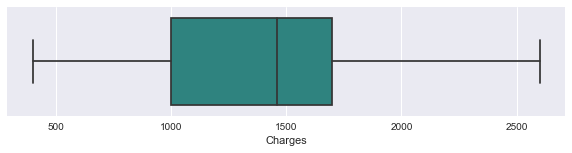

In [154]:
plt.figure(figsize=(10,2))
sns.boxplot(data['Charges'],palette='viridis')
plt.show()

In [155]:
# q1,q3=np.percentile(data['Charges'],[25,75])
# iqr=q3-q1
# lower=q1-(iqr*1.5)
# upper=q3+(iqr*1.5)
# data['Charges']= np.where(data['Charges']>upper,upper,np.where(data['Charges']<lower,lower,data['Charges']))

In [156]:
datas=data.copy()

In [157]:
data['Destination'].unique()

array(['MADEENA', 'JEDDAH', 'BURIDHA', 'LOCAL TRANSFER', 'NAJRAN',
       'YANBU', 'AL JOUF', 'ARAR', 'HAIL', 'QURIYATH', 'HAFER AL BATHEN',
       'MAJMA', 'ABAHA', 'JIZAN', 'TABUK', 'MAKKAH', 'DAWADMI',
       'WADI DAWASSIR', 'AL QASEEM', 'DAMMAM', 'AL KHARAJ',
       'WADI DAWASSIR (DEDICATED)', 'NAJRAN (DEDICATED)',
       'DAWADMI (DEDICATED)', 'TAIF'], dtype=object)

In [158]:
le=LabelEncoder()
data['From']=le.fit_transform(data['From'])
data['Destination']=le.fit_transform(data['Destination'])
data['Vehicle Type']=le.fit_transform(data['Vehicle Type'])

In [159]:
data['Destination'].unique()

array([14, 11,  5, 13, 17, 24,  1,  4, 10, 19,  9, 15,  0, 12, 20, 16,  7,
       22,  3,  6,  2, 23, 18,  8, 21])

In [160]:
data

,From,Destination,Vehicle Type,Charges
0,0,14,1,1700
1,0,11,1,1400
2,0,5,0,800
3,0,11,1,1400
4,0,14,0,1450
...,...,...,...,...
1049,0,10,1,1450
1050,0,22,0,700
1051,0,7,0,600
1052,0,4,0,1600


<div style="padding:25px;color:black;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#B9C0C9;overflow:hidden;font-weight:500;font-family:magra">Correlation heatmap</div>

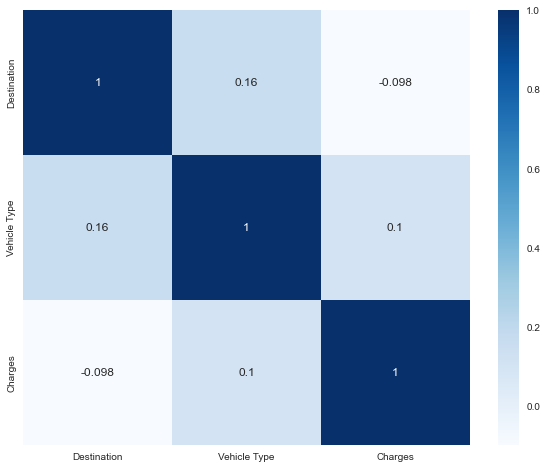

In [161]:
df=data.drop('From',axis=1)
correlation=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,cmap='Blues',annot=True)
plt.show()

<div style="padding:25px;color:black;margin:0;font-size:250%;text-align:center;display:fill;border-radius:10px;background-color:#D4C8BA;overflow:hidden;font-weight:500;font-family:magra">Data visualization</div>

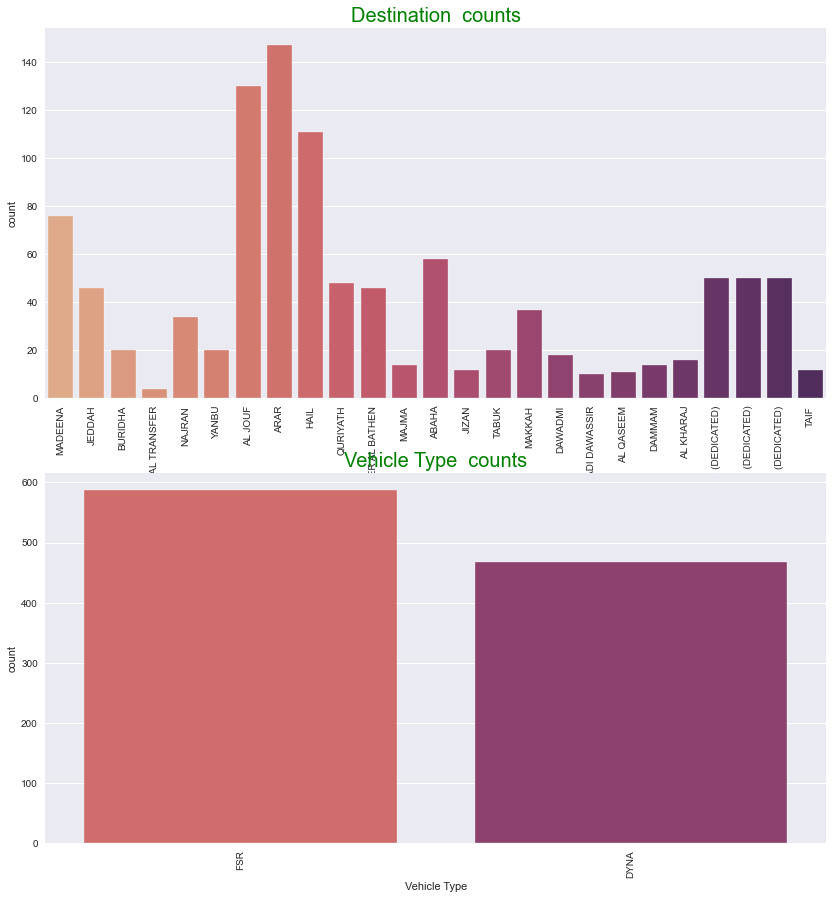

In [162]:
plt.figure(figsize=(14,15))
cols=['Destination','Vehicle Type']
for i,name in enumerate(cols):
    plt.subplot(2,1,i+1)
    sns.countplot(datas[name],palette='flare')
    plt.xlabel(name)
    plt.title(name+'  counts',color='green',size=20)
    plt.xticks(rotation=90)

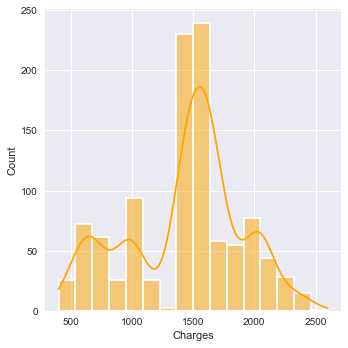

In [163]:

sns.displot(data['Charges'],kde=True,lw=10,color='orange')
plt.show()

### Let's check top 7 Charges 

In [164]:
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#D4C8BA","figure.facecolor":"#D4C8BA"})
sns.set_context(context=None,font_scale = .7)


In [165]:
list(data["Charges"].value_counts().keys()[0:7])

[1600, 1450, 1000, 2025, 1400, 600, 1700]

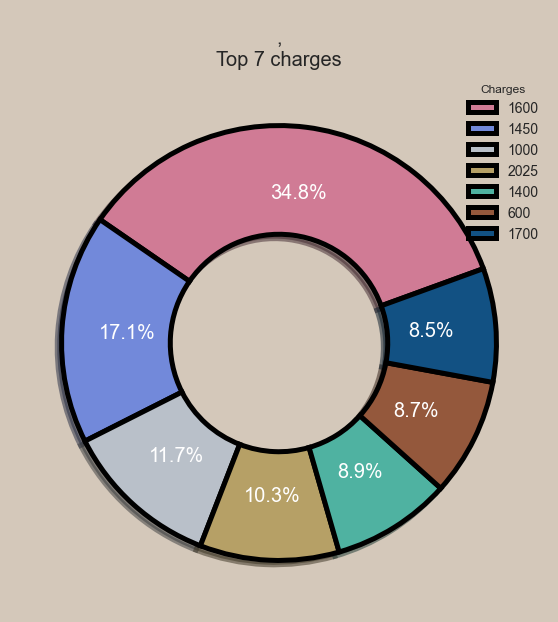

In [166]:
plt.figure(figsize=(11,10))
values= data["Charges"].value_counts()[0:7]
label=list(data["Charges"].value_counts().keys()[0:7])
wedges, texts, autotexts=plt.pie(values,
                                 textprops=dict(size=20,color='white'),
                                  autopct='%1.1f%%',
                                          pctdistance = 0.7,
                                 colors=['#d07b95','#7289da',"#B9C0C9",'#b6a066','#4fb2a1','#94583C','#125183'],
                                shadow=True,startangle=20,
                                wedgeprops=dict(width=0.5,edgecolor='black',linewidth=5))
plt.legend(wedges,labels=label,loc='upper right',title='Charges',edgecolor='black',fontsize=14)
plt.title('\n,\nTop 7 charges',fontsize=20)
plt.show()

In [167]:
# def displot_hue(data,x):
#     sns.displot(data=data,x=x,hue="Charges",kde=True,bins=40,col="Charges",height=9).set(title=(f"Density Plots\n{x}"))

    
# numerical=['Destination','Vehicle Type']
# for feature in numerical:
#     displot_hue(data=datas, x=feature)

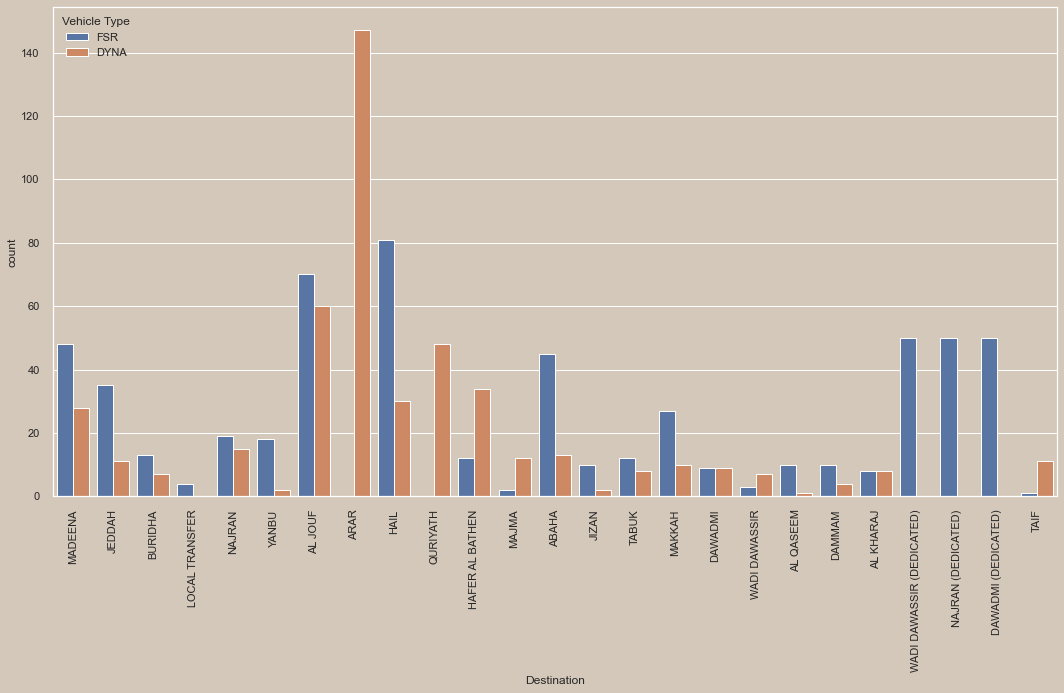

In [168]:
plt.figure(figsize=(18,9))
sns.countplot(datas['Destination'],hue=datas['Vehicle Type'])
plt.xticks(rotation=90)
plt.show()

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
x=data.drop('Charges',axis=1)
y=data['Charges']

In [171]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=15)

<div style="padding:25px;color:black;margin:0;font-size:250%;text-align:center;display:fill;border-radius:10px;background-color:#D4C8BA;overflow:hidden;font-weight:500;font-family:magra">Hyperparameter tuning</div>

In [172]:
t_model={'Randomforest':{'model':RandomForestRegressor(),'param':{'n_estimators':[1,5,60,57,100]}},
       'Decisiontree':{'model':DecisionTreeRegressor(),'param':{'max_depth':[1,4,7,10,2,16]}},
        'Adaboosting':{'model':AdaBoostRegressor(),'param':{'n_estimators':[10,40,50,70],
                     'base_estimator':[None],'learning_rate':[0.2,0.3,0.5],'random_state':
                                                            [20,30,40,100]}}}

In [173]:
models=['Randomforest','Decisiontree','Adaboosting']
scores=[]
for i in models:
    mp=t_model[i]
    gds=GridSearchCV(mp['model'],mp['param'],return_train_score=True,cv=5)
    gds.fit(x_train,y_train)
    scores.append({'model':i,'best_score':gds.best_score_,'best_parameter':gds.best_params_})    

In [174]:
score=pd.DataFrame(scores)
score

,model,best_score,best_parameter
0,Randomforest,0.971846,{'n_estimators': 5}
1,Decisiontree,0.973889,{'max_depth': 16}
2,Adaboosting,0.592634,"{'base_estimator': None, 'learning_rate': 0.5,..."


In [175]:
# def svm_eval(x,y,C,degree,test_size,gamma):
#     eval_df=pd.DataFrame()
#     for xx in test_size:
#         x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=xx,random_state=10)
#         for c in C:
#             for deg in degree:
#                 for gam in gamma:
#                     model=SVR(gamma=gam,C=c,degree=deg)
#                     model.fit(x_train,y_train)
#                     y_pred=model.predict(x_test)
                    
#                     dict={'test_size':xx,'C':c,'degree':deg,'gamma':gam,'score':model.score(x_test,y_test)}
#                     eval_df=eval_df.append(dict,ignore_index=True)
#     return(eval_df)

In [176]:
# C=range(5,11)
# eval_df=svm_eval(x,y,C,degree=[5,10,15],test_size=[.15,.20,.25,.30],gamma=['auto','scale'])

In [177]:
# eval_df

In [178]:
# eval_df[eval_df['score']>0.80]

In [179]:
# dic=[{'model':'SVC','best_score':0.946372,'best_parameter':{'c':0.3,'degree':15,'gamma':"auto"}}]
# df=pd.DataFrame(dic)
# df

In [180]:
score=pd.concat([score,df])
score

,model,best_score,best_parameter,Destination,Vehicle Type,Charges
0,Randomforest,0.971846,{'n_estimators': 5},NaN,NaN,NaN
1,Decisiontree,0.973889,{'max_depth': 16},NaN,NaN,NaN
2,Adaboosting,0.592634,"{'base_estimator': None, 'learning_rate': 0.5,...",NaN,NaN,NaN
0,NaN,NaN,NaN,14.0,1.0,1700.0
1,NaN,NaN,NaN,11.0,1.0,1400.0
...,...,...,...,...,...,...
1049,NaN,NaN,NaN,10.0,1.0,1450.0
1050,NaN,NaN,NaN,22.0,0.0,700.0
1051,NaN,NaN,NaN,7.0,0.0,600.0
1052,NaN,NaN,NaN,4.0,0.0,1600.0


<div style="padding:25px;color:black;margin:0;font-size:170%;text-align:center;display:fill;border-radius:10px;background-color:#B9C0C9;overflow:hidden;font-weight:500;font-family:magra">Model performence comparison</div>

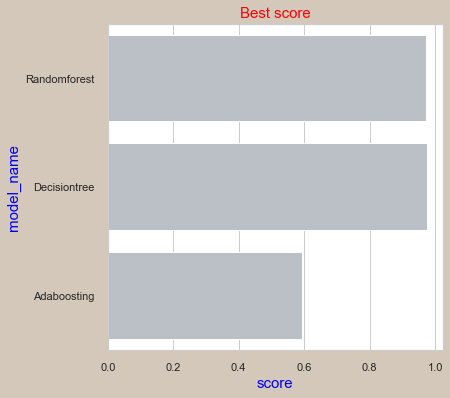

In [181]:
plt.figure(figsize=(6,6))
sns.set(style="whitegrid")
sns.barplot(y='model',x='best_score',data=score,color='#B9C0C9')

plt.ylabel('model_name',fontdict={'fontsize':15},color='blue')
plt.xlabel('score',fontdict={'fontsize':15},color='blue')
plt.title('Best score',fontdict={'fontsize':15},color='red')
plt.show()

<div style="padding:25px;color:black;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#B9C0C9;overflow:hidden;font-weight:500;font-family:magra">Prediction and saving model</div>

In [187]:
model=RandomForestRegressor(n_estimators=10)

In [188]:
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10)

In [189]:
model.score(x_test,y_test)

0.9880473762507391

In [190]:
model.predict([[0,14,1]])

array([1700.])

In [184]:
from joblib import dump

In [185]:
dump(model,'C:/Users/savad/Desktop/al_nashi/savedmodels/model.joblib')

['C:/Users/savad/Desktop/al_nashi/savedmodels/model.joblib']